    1.) Data Formatting
    2.) Data Visualization Analysis
    3.) Multi-Class Classification with Sci Kit Learn
    4.) Explanation of K Nearest Neighbors
    5.) K Nearest Neighbors with Sci Kit Learn
    6.) Conclusion
    
# Iris Data Set

https://en.wikipedia.org/wiki/Iris_flower_data_set

    Using one vs all logistic regression method

In [1]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import linear_model
from sklearn.datasets import load_iris

%matplotlib inline

# Step 1 Data Formatting

In [2]:
# iris datasets from skleran
iris = load_iris()

In [3]:
X = iris.data
Y = iris.target

In [4]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
# Feature Dataframe
iris_data = DataFrame(X,columns=['Sepal Lenght','Sepal Width','Petal Lenght','Petal Width'])

In [6]:
# Target Dataframe
iris_target = DataFrame(Y,columns =['Species'])

In [7]:
iris_target.head()


,Species
0,0
1,0
2,0
3,0
4,0


In [8]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [9]:
# species are classified as 0,1,2
# rename with the name values on Species

def flower(num):
    if num == 0:
        return 'Setosa'
    elif num ==1:
        return 'Versicolor'
    else:
        return 'Virginica'


In [10]:
# apply it to the iris target dataframe

iris_target['Species']=iris_target['Species'].apply(flower)

In [11]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [12]:
# Combined iris datasets

iris = pd.concat([iris_data,iris_target],axis=1)

In [13]:
iris.head()

,Sepal Lenght,Sepal Width,Petal Lenght,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Step 2 Visualization

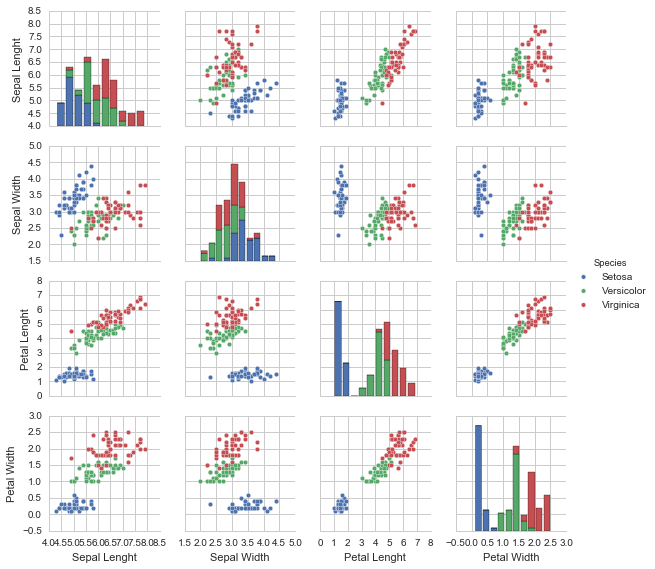

In [14]:
# Pairplot for different features

sns.pairplot(iris,hue = 'Species',size = 2)

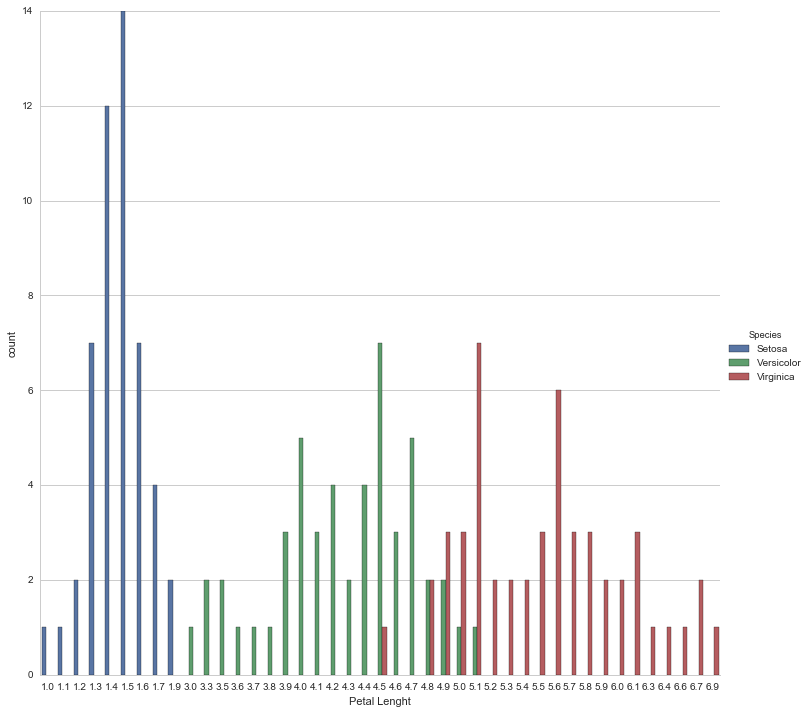

In [15]:
# it looks  like setosa is different from other two

sns.factorplot('Petal Lenght',data=iris, hue='Species',size=10, kind = 'count')

In [16]:
# To do More visualization



# Step 3. Multi-Class Classification with Sci Kit Learn


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [18]:
logreg = LogisticRegression()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)


In [20]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# check accuracy
from sklearn import metrics

In [23]:
y_pred = logreg.predict(x_test)

In [24]:
print metrics.accuracy_score(y_test,y_pred)

0.933333333333


#  Step 4. K Nearest neighbor

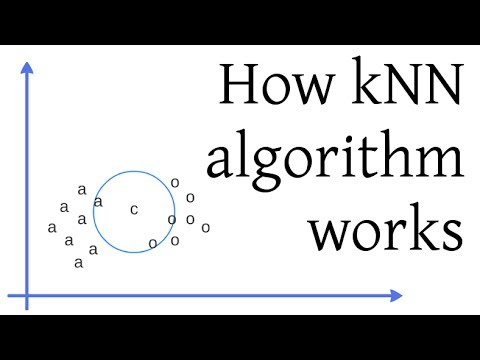

In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo('UqYde-LULfs')

#  Step 5. KNN implementation

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=6) #nearest neighbour data point to look for 6

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [32]:
y_pred = knn.predict(x_test)

In [33]:
print metrics.accuracy_score(y_test,y_pred)

0.95


In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [37]:
y_pred = knn.predict(x_test)

In [38]:
print metrics.accuracy_score(y_test,y_pred)

0.966666666667


In [39]:
k_range = range(1,21)
accuracy =[]

In [40]:
# check the accuracy from 1 to 21
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

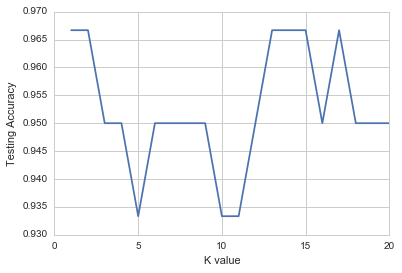

In [41]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')